# Verbform Collocations

In [1]:
from scripts.imports import *
out = Exporter(paths['outdir'], 'aspect')

# NB: here we will restrict clauses to those not headed by wayehi;
# these are dependent clauses where the verb does not act as a verb (Harmelink2011:275)
df_wayehi = df_sg[(df_sg.verb_text == 'יהי') & (df_sg.verbform == 'wayq')]
df_cl = df_sg[~df_sg.index.isin(df_wayehi.index)]

In [2]:
print(df.shape)
print(df_sg.shape)
print(df_cl.shape)

(3648, 62)
(2575, 62)
(2450, 62)


In [3]:
df.head()

,verse,book,booksuper,canon_part,period,times_etcbc,times_utf8,times_utf8d,times_POS,TA Heads,...,ADJV,TIMEAPPO,SPEC,SFX3,SFX,DU,SFX1,SFX2,ADVB,CARDC
node,,,,,,,,,,,,,,,,,,,,,
427553,Genesis 1:1,Genesis,Genesis,Law,SBH,R>CJT/,ראשׁית,תישאר,NOUN,\texthebrew{ראשית},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427680,Genesis 2:2,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427682,Genesis 2:2,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427693,Genesis 2:5,Genesis,Genesis,Law,SBH,VRM/,טרם,םרט,PREP,\texthebrew{טרם},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427694,Genesis 2:5,Genesis,Genesis,Law,SBH,VRM/,טרם,םרט,PREP,\texthebrew{טרם},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_sg.head()

,verse,book,booksuper,canon_part,period,times_etcbc,times_utf8,times_utf8d,times_POS,TA Heads,...,ADJV,TIMEAPPO,SPEC,SFX3,SFX,DU,SFX1,SFX2,ADVB,CARDC
node,,,,,,,,,,,,,,,,,,,,,
427553,Genesis 1:1,Genesis,Genesis,Law,SBH,R>CJT/,ראשׁית,תישאר,NOUN,\texthebrew{ראשית},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427680,Genesis 2:2,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427682,Genesis 2:2,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427805,Genesis 3:8,Genesis,Genesis,Law,SBH,RWX/,רוח,חור,NOUN,\texthebrew{רוח},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427835,Genesis 3:14,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Verb Form

In [5]:
vf_ct = df_cl.pivot_table(
    index='quality',
    columns='verbform',
    aggfunc='size',
    fill_value=0,
)

vf_ct.drop(['infa', 'infc'], axis=1, inplace=True)

vf_ct = vf_ct.loc[vf_ct.sum(1).sort_values(ascending=False).index]

vf_pr = vf_ct.div(vf_ct.sum(1), 0)


vf_ct

verbform,impv,ptcp,qtl,wayq,wqtl,yqtl
quality,,,,,,
location,37,105,301,222,126,320
duration,16,46,182,170,84,272
sequence,0,3,41,22,1,28
iteration,4,5,2,1,3,9


In [6]:
vf_pr

verbform,impv,ptcp,qtl,wayq,wqtl,yqtl
quality,,,,,,
location,0.033303,0.094509,0.270927,0.199820,0.113411,0.288029
duration,0.020779,0.059740,0.236364,0.220779,0.109091,0.353247
sequence,0.000000,0.031579,0.431579,0.231579,0.010526,0.294737
iteration,0.166667,0.208333,0.083333,0.041667,0.125000,0.375000


In [7]:
vf_fs, vf_odds = sig.apply_fishers(vf_ct, 0, 1)

vf_fs

,impv,ptcp,qtl,wayq,wqtl,yqtl
location,0.753664,2.225435,0.414444,-0.460729,0.510016,-2.307353
duration,-0.892707,-1.972570,-1.487950,0.589612,0.084201,2.456605
sequence,-0.957954,-1.093222,3.539537,0.284233,-3.330735,-0.133865
iteration,2.385186,1.434991,-1.231593,-1.371461,0.132600,0.289753


In [8]:
vf_dp = sig.apply_deltaP(vf_ct, 0, 1)
vf_dp2 = sig.apply_deltaP(vf_ct.T, 0, 1)

vf_dp

verbform,impv,ptcp,qtl,wayq,wqtl,yqtl
quality,,,,,,
location,0.010806,0.033767,0.017834,-0.017278,0.014424,-0.059553
duration,-0.012554,-0.032130,-0.043311,0.021592,0.003400,0.063003
sequence,-0.029921,-0.050311,0.176986,0.025280,-0.101285,-0.020749
iteration,0.139845,0.130398,-0.181849,-0.167848,0.018219,0.061235


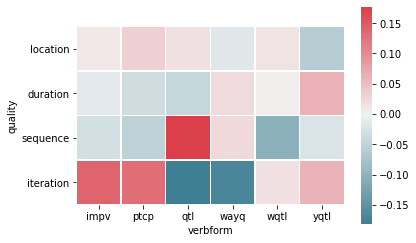

In [9]:
heatmap(vf_dp)

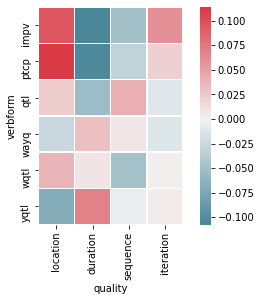

In [10]:
heatmap(vf_dp2)

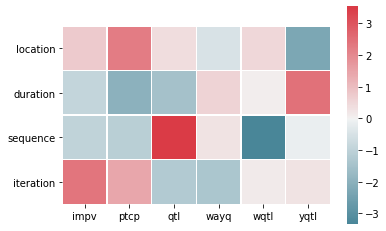

In [11]:
heatmap(vf_fs)

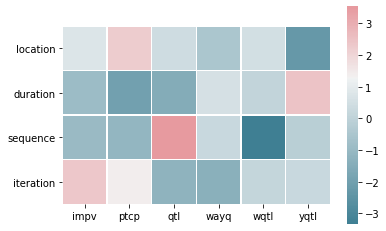

In [12]:
heatmap(vf_fs, center=1.3)

## Examples of qtl + seq

In [13]:
df_cl[
    (df_cl.verbform == 'qtl')
    & (df_cl.quality == 'sequence')
][['verse', 'clause', 'verb_text']].head(10)

,verse,clause,verb_text
node,,,
428404,Genesis 10:32,וּמֵאֵ֜לֶּה נִפְרְד֧וּ הַגֹּויִ֛ם בָּאָ֖רֶץ אַ...,נפרדו
430797,Genesis 30:30,אֲשֶׁר־הָיָ֨ה לְךָ֤ לְפָנַי֙,היה
433230,Genesis 48:6,אֲשֶׁר־הֹולַ֥דְתָּ אַחֲרֵיהֶ֖ם,הולדת
433499,Genesis 50:16,אָבִ֣יךָ צִוָּ֔ה לִפְנֵ֥י מֹותֹ֖ו,צוה
434635,Exodus 10:14,לְ֠פָנָיו לֹא־הָ֨יָה כֵ֤ן אַרְבֶּה֙ כָּמֹ֔הוּ,היה
448370,Deuteronomy 31:29,כִּ֣י יָדַ֗עְתִּי אַחֲרֵ֤י מֹותִי֙,ידעתי
451086,Joshua 24:31,אֲשֶׁ֨ר הֶאֱרִ֤יכוּ יָמִים֙ אַחֲרֵ֣י יְהֹושֻׁ֔עַ,האריכו
461659,1_Kings 3:12,אֲשֶׁ֤ר כָּמֹ֨וךָ֙ לֹא־הָיָ֣ה לְפָנֶ֔יךָ,היה
463194,1_Kings 13:33,אַחַר֙ הַדָּבָ֣ר הַזֶּ֔ה לֹֽא־שָׁ֥ב יָרָבְעָ֖ם...,שׁב


## Examples of yqtl + dur

In [14]:
df_cl[
    (df_cl.verbform == 'yqtl')
    & (df_cl.quality == 'duration')
][['verse', 'clause', 'verb_text']].head(10)

,verse,clause,verb_text
node,,,
427835,Genesis 3:14,וְעָפָ֥ר תֹּאכַ֖ל כָּל־יְמֵ֥י חַיֶּֽיךָ׃,תאכל
427851,Genesis 3:17,בְּעִצָּבֹון֙ תֹּֽאכֲלֶ֔נָּה כֹּ֖ל יְמֵ֥י חַיּ...,תאכלנה
428066,Genesis 6:3,לֹֽא־יָדֹ֨ון רוּחִ֤י בָֽאָדָם֙ לְעֹלָ֔ם,ידון
428260,Genesis 8:22,עֹ֖ד כָּל־יְמֵ֣י הָאָ֑רֶץ זֶ֡רַע וְ֠קָצִיר וְק...,ישׁבתו׃
430615,Genesis 29:18,אֶֽעֱבָדְךָ֙ שֶׁ֣בַע שָׁנִ֔ים בְּרָחֵ֥ל בִּתְּ...,אעבדך
430646,Genesis 29:27,אֲשֶׁ֣ר תַּעֲבֹ֣ד עִמָּדִ֔י עֹ֖וד שֶֽׁבַע־שָׁנ...,תעבד
431215,Genesis 32:33,עַל־כֵּ֡ן לֹֽא־יֹאכְל֨וּ בְנֵֽי־יִשְׂרָאֵ֜ל אֶ...,יאכלו
434597,Exodus 10:7,עַד־מָתַי֙ יִהְיֶ֨ה זֶ֥ה לָ֨נוּ֙ לְמֹוקֵ֔שׁ,יהיה
434763,Exodus 12:10,וְלֹא־תֹותִ֥ירוּ מִמֶּ֖נּוּ עַד־בֹּ֑קֶר,תותירו


## Test with Front Included

In [15]:
fr_ct = df_cl.pivot_table(
    index=['front_etcbc', 'quality'],
    columns=['verbform'],
    aggfunc='size',
    fill_value=0,
)

fr_ct = fr_ct.loc[fr_ct.sum(1).sort_values(ascending=False).index]
fr_ct = fr_ct.loc[fr_ct.sum(1) >= 5]
fr_ct = fr_ct.drop(['infc', 'infa'], axis=1)

fr_ct

,verbform,impv,ptcp,qtl,wayq,wqtl,yqtl
front_etcbc,quality,,,,,,
B,location,20,46,209,201,107,236
Ø,duration,7,12,105,114,35,107
<D,duration,6,14,35,48,39,84
Ø,location,10,53,80,8,10,43
L,duration,3,10,13,4,9,79
MN,duration,0,9,27,1,0,1
Ø,sequence,0,2,20,4,0,5
L,location,0,3,3,8,1,15
K,location,7,2,7,1,0,10


In [16]:
fr_dp = sig.apply_deltaP(fr_ct, 0, 1)

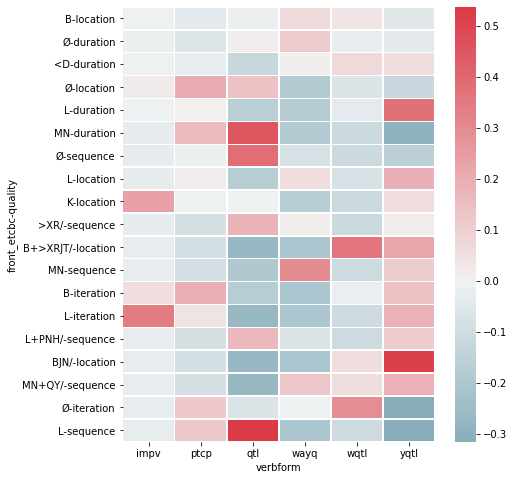

In [17]:
fig, ax = plt.subplots(figsize=(7, 8))
heatmap(fr_dp, ax=ax, square=False)

In [18]:
fr_dp2 = sig.apply_deltaP(fr_ct, 1, 0) # <- NB flipped

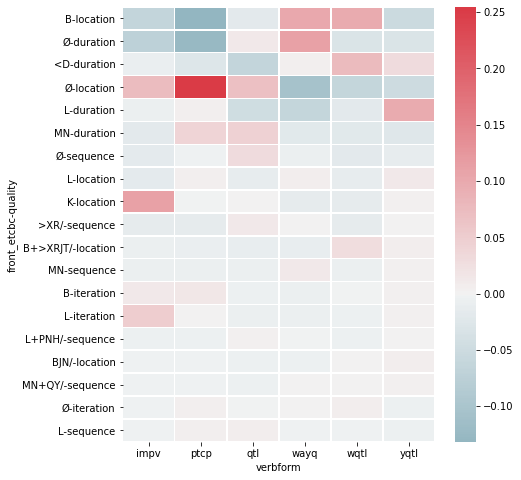

In [19]:
fig, ax = plt.subplots(figsize=(7, 8))
heatmap(fr_dp2, ax=ax, square=False)

In [20]:
fr_fs, fr_odds = sig.apply_fishers(fr_ct, 0, 1)

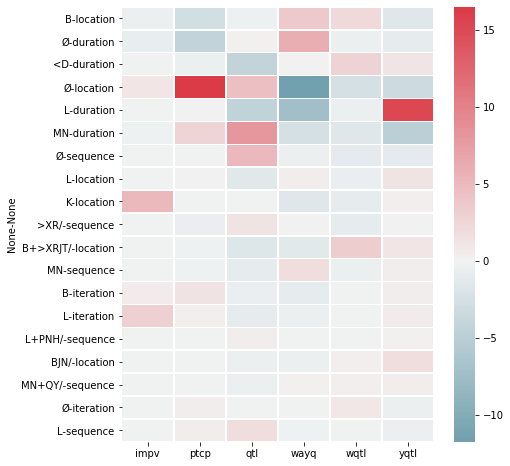

In [21]:
fig, ax = plt.subplots(figsize=(7, 8))
heatmap(fr_fs, ax=ax, square=False)

# Verb Stem

In [22]:
df_cl.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'function',
       'quality', 'name', 'text', 'n_times', 'lex_token', 'is_advb', 'tense',
       'verb', 'verbform', 'verb_stem', 'verb_etcbc', 'verb_utf8', 'verb_text',
       'clause', 'sentence', 'cl_rela', 'domain', 'genre', 'gendom', 'cl_kind',
       'verbtense', 'clargs', 'has_objc', 'has_cmpl', 'has_oc', 'vt_order',
       'PP', 'front_etcbc', 'front', 'unmodified', 'APPO', 'DEF', 'ORDN',
       'ØPP', 'GP', 'QUANT', 'PL', 'NUM', 'PARA', 'DEMON', 'demon_type',
       'ADJV', 'TIMEAPPO', 'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1', 'SFX2', 'ADVB',
       'CARDC'],
      dtype='object')

In [23]:
stem_ct = df_cl.pivot_table(
    index='quality',
    columns='verb_stem',
    aggfunc='size',
    fill_value=0,
)

stem_ct = stem_ct.drop(['htpo', 'hof', 'pual'], axis=1)

stem_ct

verb_stem,hif,hit,nif,piel,qal
quality,,,,,
duration,65,22,54,57,610
iteration,5,0,2,3,15
location,178,17,81,114,759
sequence,27,0,7,8,53


In [24]:
stem_pr = stem_ct.div(stem_ct.sum(1), 0)

stem_pr

verb_stem,hif,hit,nif,piel,qal
quality,,,,,
duration,0.080446,0.027228,0.066832,0.070545,0.754950
iteration,0.200000,0.000000,0.080000,0.120000,0.600000
location,0.154917,0.014795,0.070496,0.099217,0.660574
sequence,0.284211,0.000000,0.073684,0.084211,0.557895


In [25]:
stem_pr2 = stem_ct.T.div(stem_ct.T.sum(1), 0)

stem_pr2

quality,duration,iteration,location,sequence
verb_stem,,,,
hif,0.236364,0.018182,0.647273,0.098182
hit,0.564103,0.000000,0.435897,0.000000
nif,0.375000,0.013889,0.562500,0.048611
piel,0.313187,0.016484,0.626374,0.043956
qal,0.424495,0.010438,0.528184,0.036882


In [26]:
stem_fs, stem_odds = sig.apply_fishers(stem_ct, 0, 1)

stem_fs

,hif,hit,nif,piel,qal
duration,-7.885908,1.519664,-0.102093,-1.502671,6.195388
iteration,0.437354,0.000000,0.160840,0.321684,-0.416957
location,3.058836,-0.835621,0.064385,1.374121,-3.235335
sequence,4.196081,-0.588464,0.078047,0.000000,-2.222101


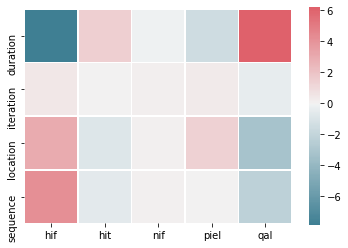

In [27]:
heatmap(stem_fs)

In [28]:
stem_dp = sig.apply_deltaP(stem_ct, 0, 1)

stem_dp

verb_stem,hif,hit,nif,piel,qal
quality,,,,,
duration,-0.085039,0.013831,-0.004090,-0.027958,0.103256
iteration,0.068421,-0.019006,0.010799,0.032768,-0.092982
location,0.050391,-0.008911,0.002608,0.025941,-0.070029
sequence,0.159084,-0.019677,0.004562,-0.003580,-0.140390


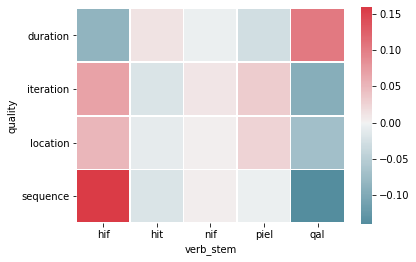

In [29]:
fig, ax = plt.subplots()
heatmap(stem_dp)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

In [30]:
# DP test from the direction of the verb stem
stem_dp2 = sig.apply_deltaP(stem_ct.T, 0, 1)

stem_dp2

quality,duration,iteration,location,sequence
verb_stem,,,,
hif,-0.175956,0.007083,0.108427,0.060446
hit,0.178430,-0.012267,-0.119549,-0.046614
nif,-0.015067,0.001990,0.009991,0.003086
piel,-0.083119,0.004874,0.080199,-0.001954
qal,0.115120,-0.005187,-0.081191,-0.028743


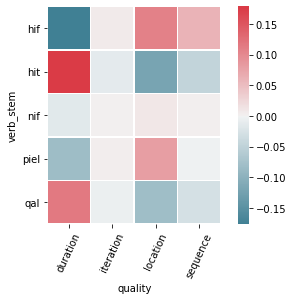

In [31]:
fig, ax = plt.subplots()
heatmap(stem_dp2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

### Hitpael + time

In [32]:
df_cl[
    (df_cl.verb_stem == 'hit')
    & (df_cl.quality == 'duration')
][['verse', 'clause', 'verb_text']]

,verse,clause,verb_text
node,,,
428030,Genesis 5:22,וַיִּתְהַלֵּ֨ךְ חֲנֹ֜וךְ אֶת־הָֽאֱלֹהִ֗ים שְׁל...,יתהלך
431795,Genesis 37:34,וַיִּתְאַבֵּ֥ל עַל־בְּנֹ֖ו יָמִ֥ים רַבִּֽים׃,יתאבל
448740,Joshua 1:5,לֹֽא־יִתְיַצֵּ֥ב אִישׁ֙ לְפָנֶ֔יךָ כֹּ֖ל יְמֵ֣...,יתיצב
450410,Joshua 18:3,עַד־אָ֨נָה֙ אַתֶּ֣ם מִתְרַפִּ֔ים,מתרפים
450789,Joshua 22:17,אֲשֶׁ֤ר לֹֽא־הִטַּהַ֨רְנוּ֙ מִמֶּ֔נּוּ עַ֖ד הַ...,הטהרנו
453065,Judges 16:2,וַיִּתְחָרְשׁ֤וּ כָל־הַלַּ֨יְלָה֙,יתחרשׁו
454000,1_Samuel 1:14,עַד־מָתַ֖י תִּשְׁתַּכָּרִ֑ין,תשׁתכרין
454198,1_Samuel 2:30,בֵּֽיתְךָ֙ וּבֵ֣ית אָבִ֔יךָ יִתְהַלְּכ֥וּ לְפָ...,יתהלכו
454220,1_Samuel 2:35,וְהתְהַלֵּ֥ךְ לִפְנֵֽי־מְשִׁיחִ֖י כָּל־הַיָּמִ...,התהלך


In [33]:
df_cl[
    (df_cl.verb_stem == 'hit')
    & (df_cl.quality == 'location')
][['verse', 'clause', 'verb_text']]

,verse,clause,verb_text
node,,,
427805,Genesis 3:8,מִתְהַלֵּ֥ךְ בַּגָּ֖ן לְר֣וּחַ הַיֹּ֑ום,מתהלך
443027,Numbers 19:12,ה֣וּא יִתְחַטָּא־בֹ֞ו בַּיֹּ֧ום הַשְּׁלִישִׁ֛י,יתחטא־
443029,Numbers 19:12,וְאִם־לֹ֨א יִתְחַטָּ֜א בַּיֹּ֧ום הַשְּׁלִישִׁ֛י,יתחטא
445274,Deuteronomy 3:23,וָאֶתְחַנַּ֖ן אֶל־יְהוָ֑ה בָּעֵ֥ת הַהִ֖וא,אתחנן
446012,Deuteronomy 9:20,וָֽאֶתְפַּלֵּ֛ל גַּם־בְּעַ֥ד אַהֲרֹ֖ן בָּעֵ֥ת ...,אתפלל
453701,Judges 20:15,וַיִּתְפָּֽקְדוּ֩ בְנֵ֨י בִנְיָמִ֜ן בַּיֹּ֤ום ...,יתפקדו
453935,Judges 21:24,וַיִּתְהַלְּכ֨וּ מִשָּׁ֤ם בְּנֵֽי־יִשְׂרָאֵל֙ ...,יתהלכו
456277,1_Samuel 18:21,בִּשְׁתַּ֛יִם תִּתְחַתֵּ֥ן בִּ֖י הַיֹּֽום׃,תתחתן
460302,2_Samuel 19:4,וַיִּתְגַּנֵּ֥ב הָעָ֛ם בַּיֹּ֥ום הַה֖וּא,יתגנב


# Verbform x Modifiers

In [34]:
df_cl.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'function',
       'quality', 'name', 'text', 'n_times', 'lex_token', 'is_advb', 'tense',
       'verb', 'verbform', 'verb_stem', 'verb_etcbc', 'verb_utf8', 'verb_text',
       'clause', 'sentence', 'cl_rela', 'domain', 'genre', 'gendom', 'cl_kind',
       'verbtense', 'clargs', 'has_objc', 'has_cmpl', 'has_oc', 'vt_order',
       'PP', 'front_etcbc', 'front', 'unmodified', 'APPO', 'DEF', 'ORDN',
       'ØPP', 'GP', 'QUANT', 'PL', 'NUM', 'PARA', 'DEMON', 'demon_type',
       'ADJV', 'TIMEAPPO', 'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1', 'SFX2', 'ADVB',
       'CARDC'],
      dtype='object')

In [35]:
modi_ct = df_cl.pivot_table(
    index=['verbform'],
    values=['DEF', 'ORDN', 'QUANT', 'PL', 'NUM', 'DEMON', 'SFX', 'unmodified'],
    aggfunc='sum',
    fill_value=0,
)

modi_ct = modi_ct.drop(['infa', 'infc'], axis=0)

In [36]:
modi_ct

,DEF,DEMON,NUM,ORDN,PL,QUANT,SFX,unmodified
verbform,,,,,,,,
impv,39,1,7,4,10,4,0,8
ptcp,99,18,3,4,23,16,9,21
qtl,236,104,91,20,146,40,49,42
wayq,259,136,102,31,90,33,8,17
wqtl,143,62,34,18,51,17,7,21
yqtl,272,98,73,35,152,61,44,144


In [37]:
modi_fs, modi_odds = sig.apply_fishers(modi_ct, 0, 1)

modi_fs

,DEF,DEMON,NUM,ORDN,PL,QUANT,SFX,unmodified
impv,2.553284,-3.573951,0.000000,0.437824,-0.199151,0.000000,-0.923186,0.279972
ptcp,5.061363,-1.465944,-6.111162,-0.612937,-0.976315,0.816118,0.242594,0.538796
qtl,-1.742025,-0.021623,1.145888,-1.121488,2.767276,-0.187186,4.326164,-3.084659
wayq,0.733014,5.463137,4.331637,0.591593,-1.761611,-0.646582,-5.518930,-12.318391
wqtl,1.172787,1.119614,-0.235845,0.728921,-0.448559,-0.397481,-1.380044,-1.258647
yqtl,-3.889247,-3.074942,-2.222710,0.078766,0.488249,0.911594,1.088950,19.487639


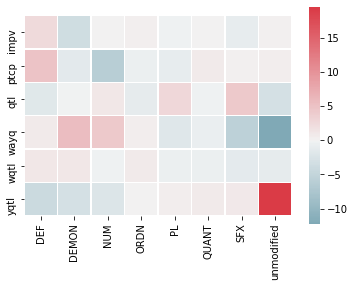

In [38]:
heatmap(modi_fs)

In [39]:
modi_dp = sig.apply_deltaP(modi_ct.T, 0, 1)

modi_dp

verbform,impv,ptcp,qtl,wayq,wqtl,yqtl
DEF,0.018875,0.043764,-0.040181,0.022218,0.023182,-0.067858
DEMON,-0.026611,-0.027520,-0.003099,0.107103,0.030774,-0.080649
NUM,-0.002882,-0.063625,0.047792,0.107582,-0.013394,-0.075473
ORDN,0.010983,-0.032028,-0.075192,0.045603,0.040643,0.009991
PL,-0.004739,-0.021230,0.069816,-0.050474,-0.016229,0.022857
QUANT,-0.001874,0.028756,-0.018004,-0.042462,-0.023617,0.057201
SFX,-0.026212,0.010855,0.174997,-0.171480,-0.064408,0.076248
unmodified,0.007083,0.018074,-0.092958,-0.181579,-0.042326,0.291707


### What % of yqtl + L is future?

In [47]:
yqtl = df_cl[
    (df_cl.verbform == 'yqtl')
    & (df_cl.unmodified == 0)
]

yqtl.shape

(512, 62)

In [41]:
yqtl

,verse,book,booksuper,canon_part,period,times_etcbc,times_utf8,times_utf8d,times_POS,TA Heads,...,ADJV,TIMEAPPO,SPEC,SFX3,SFX,DU,SFX1,SFX2,ADVB,CARDC
node,,,,,,,,,,,,,,,,,,,,,
427835,Genesis 3:14,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427851,Genesis 3:17,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428066,Genesis 6:3,Genesis,Genesis,Law,SBH,<WLM/,עולם,םלוע,NOUN,\texthebrew{עולם},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428260,Genesis 8:22,Genesis,Genesis,Law,SBH,JWM/,יום,םוי,NOUN,\texthebrew{יום},...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428989,Genesis 18:10,Genesis,Genesis,Law,SBH,<T/,עת,תע,NOUN,\texthebrew{עת},...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512203,1_Chronicles 28:9,1_Chronicles,Chronicles,Writings,LBH,<D/,עד,דע,NOUN,\texthebrew{עד},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512403,2_Chronicles 1:12,2_Chronicles,Chronicles,Writings,LBH,>XR/,אחר,רחא,PREP,\texthebrew{אחר},...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
514113,2_Chronicles 21:10,2_Chronicles,Chronicles,Writings,LBH,<T/,עת,תע,NOUN,\texthebrew{עת},...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
yqtl_tense = yqtl.pivot_table(
    index=['verbtense'],
    columns=['unmodified'],
    aggfunc='size',
    fill_value=0,
)

In [43]:
yqtl_tense

unmodified,0,1
verbtense,,
FUT,130,57
HAB used to,1,0
IMPV,16,5
MOD can,4,0
MOD is to,3,0
MOD lest,1,0
MOD let,19,5
MOD may,17,6
MOD might,1,1


In [50]:
pr_yqtl_mod = yqtl_tense.T.div(yqtl_tense.T.sum(1), 0)

pr_yqtl_mod

verbtense,FUT,HAB used to,IMPV,MOD can,MOD is to,MOD lest,MOD let,MOD may,MOD might,MOD must,MOD shall,MOD should,MOD was to,MOD would,PAST,PAST PERF,PRES,PRES PART,PRES shall,TO INF
unmodified,,,,,,,,,,,,,,,,,,,,
0,0.262097,0.002016,0.032258,0.008065,0.006048,0.002016,0.038306,0.034274,0.002016,0.010081,0.399194,0.018145,0.002016,0.004032,0.024194,0.002016,0.141129,0.004032,0.002016,0.006048
1,0.401408,0.000000,0.035211,0.000000,0.000000,0.000000,0.035211,0.042254,0.007042,0.014085,0.274648,0.014085,0.000000,0.007042,0.014085,0.000000,0.140845,0.000000,0.000000,0.014085


In [51]:
pr_yqtl_dp = sig.apply_deltaP(yqtl_tense.T, 0, 1)

pr_yqtl_dp

verbtense,FUT,HAB used to,IMPV,MOD can,MOD is to,MOD lest,MOD let,MOD may,MOD might,MOD must,MOD shall,MOD should,MOD was to,MOD would,PAST,PAST PERF,PRES,PRES PART,PRES shall,TO INF
unmodified,,,,,,,,,,,,,,,,,,,,
0,-0.139312,0.002016,-0.002953,0.008065,0.006048,0.002016,0.003095,-0.007979,-0.005026,-0.004004,0.124546,0.004061,0.002016,-0.00301,0.010109,0.002016,0.000284,0.004032,0.002016,-0.008036
1,0.139312,-0.002016,0.002953,-0.008065,-0.006048,-0.002016,-0.003095,0.007979,0.005026,0.004004,-0.124546,-0.004061,-0.002016,0.00301,-0.010109,-0.002016,-0.000284,-0.004032,-0.002016,0.008036


In [44]:
yqtl.unmodified.value_counts()

0    512
1    144
Name: unmodified, dtype: int64

In [45]:
df_cl.unmodified.value_counts()

0    2144
1     306
Name: unmodified, dtype: int64